# Astrophysics Laboratory - IPython notebook

Welcome students! :)

In this laboratory you work with the Hubble Deep Field (HDF). You have measured photometry in U, B, V, and I bands for some selected galaxies, and now you wish to analyse the photometry by fitting by best galaxy spectrum and extracting the redshift of the galaxy.

You will fit the best galaxy template spectrum and extract the redshift of the galaxy using this interface, which is called **IPython notebook**. IPython notebook is one of the most popular tools in astronomy and it has many advantages. One of them is that you can edit code, save plots, and share it with your collaborators. Many researchers use IPython notebook as their "laboratory notebook". It can also be used as a tutorial, which is partialy the goal here :)

There are two types of cells in an IPython notebook:

1. **Text cell** - like this one, this is a cell where you write text and not code. To turn a cell into a text cell go to "Cell" -> "Cell Type" -> "Markdown".
To edit a text cell, just double-click on the text.

2. **Code cell** - like the next cell, this is a cell where you can edit your code and produce plots. To turn a cell into a code cell go to "Cell" -> "Cell Type" -> "Code". 
To edit a code cell, just click on the code in the cell.

**To run a cell** (either code or text) - press "ctrl"+"enter" on your keyboard when you are in edit mode! 

In [2]:
# comment: this is a code cell, in this cell we import python libraries and edit the plotting setup.

%pylab inline
import numpy
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['text.usetex'] = False

Populating the interactive namespace from numpy and matplotlib


## Goal 1 - Ploting galaxy spectra and showing the photometric filters

In the first part, we will plot the galaxy template spectra that we will use for the redshift estimation, and we will show what the photometric filters look like, so that you can see in which regions in wavelengths the photons are counted.

As a first step, we use the galaxy spectra templates with redshift **z=0**.

In [7]:
# load the spectra and plot them
plt.rcParams['figure.figsize'] = 10, 6


list_of_spectra = glob.glob("Spectra\\*.dat")

galaxy_names = []
for p, path in enumerate(list_of_spectra):
    # extract galaxy name
    galaxy_name = path.split("\\")[-1][:-4]
    
    # load the wavelength and spectrum
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    wl_small = wl[(wl >= 2200) & (wl <= 9500)]
    spec_small = spec[(wl >= 2200) & (wl <= 9500)]
    spec_small_norm = spec_small / numpy.median(spec_small)

    # plot the spectrum in the selected range
    plt.figure(p + 1)
    plt.title("galaxy type: %s" % galaxy_name)
    plt.plot(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalised flux ()")
    

In [8]:
plt.rcParams['figure.figsize'] = 10, 6

# constract here the filters
wl_filter_small = numpy.arange(2200, 9500, 1)
filter_centers = numpy.array([3000, 4500, 6060, 8140])
filter_widths = numpy.array([1521, 1501, 951, 766])/2
filters = []
for i in range(len(filter_centers)):
    center = filter_centers[i]
    width = filter_widths[i]
    filter_spec = numpy.zeros(len(wl_filter_small))
    filter_spec[(wl_filter_small >= (center - width)) & (wl_filter_small <= (center + width))] = 1.0
    filters.append(filter_spec)
colors_filters = ['purple', 'blue', 'green', 'red']
    
# load the spectra and plot them, plot the response curves of the filters as well
list_of_spectra = glob.glob("Spectra\\*.dat")
galaxy_names = []
for p, path in enumerate(list_of_spectra):
    # extract galaxy name
    galaxy_name = path.split("\\")[-1][:-4]
    
    # load the wavelength and spectrumchi_value = return_residuals(p_out, meas_photo, meas_photo_err, wl_template, spec_template)
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    wl_small = wl[(wl >= 2200) & (wl <= 9500)]
    spec_small = spec[(wl >= 2200) & (wl <= 9500)]
    spec_small_norm = spec_small / numpy.median(spec_small)
    
    # plot the spectrum in the selected range
    plt.figure(p + 1)
    plt.title("galaxy type: %s" % galaxy_name)
    plt.step(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalised flux ()")
    
    # plot the filters as well
    max_value = numpy.percentile(spec_small_norm, 90) * 0.5
    for i in range(len(filters)):
        plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
        plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
        
    plt.ylim(0, max_value * 2 * 1.5)

## Goal 2 - changing the redshift of the galaxy and comparing the location of photometry

Now that you know what the galaxy template spectra look like, you will choose a speicifc galaxy and will examine what is the effect of redshift on this galaxy and on its photometry. You can change the galaxy type by yourself and see what happens! You can also change the redshift of the galaxy, what happens to the photons that enter each filter?

In [9]:
##### Here the student can change the values #####
redshift = 0.4
galaxy_type = "elliptical"
##################################################

# load the relevant galaxy
for galaxy_type in galaxies:
    path = "Spectra/%s.dat" % galaxy_type
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

    # apply a redshift transformation to the galaxy spectrum
    wl_redshifted = wl * (1 + redshift)

    # move to a common wavelength grid
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    spec_small_norm = spec_small / numpy.median(spec_small)

    # plot the galaxy after the redshift transformation
    plt.title("galaxy type: %s" % galaxy_type)
    plt.step(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalised flux ()")

    # the filters do not move, so we can just plot them as they were
    max_value = numpy.max(spec_small_norm) * 0.5
    for i in range(len(filters)):
        plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
        plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)


    # create the synthetic photometry according to this redshift
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)

    plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=15, label="model photometry")
    plt.legend(loc="best")

    plt.ylim(0, max_value * 2 * 1.5)
    plt.show()

NameError: name 'galaxies' is not defined

## Goal 3 - fitting your own photometry to a galaxy template and redshift

Now that you have seen what different redshifts do to the photometry that we measure, you can start fitting your own photometry. You should fill the first few lines in the following code: 
1. Insert the photometry that you measured with its errors.
2. Choose a galaxy type from the following list: elliptical, S0, Sa, Sb, sbt1, sbt2, sbt3, sbt4, sbt5, sbt6
3. Choose a redshift for the galaxy: you should choose something in the range 0 to 1.

The code will calculate the photometry of your chosen model at the chosen redshift, and will plot your photometry and model photometry so you can compare the two. The code also outputs the chi square that corresponds to this model.

(0, 23.308839145393534)

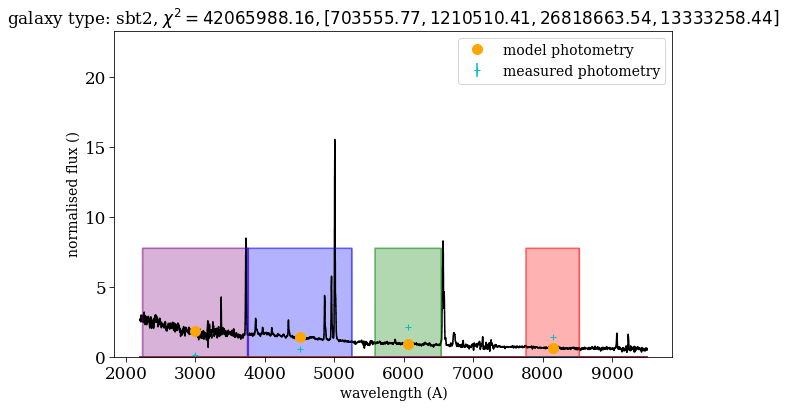

In [10]:
##### Here the student can change the values #####
U = 93.530086
dU = 0.9

B = 319.48636
dB = 0.31

V = 1155.955166
dV = 0.14

I = 772.012731
dI = 0.13

galaxy_type = "sbt2"
redshift = 0
##################################################

# load the relevant galaxy
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)

# plot the galaxy after the redshift transformation
plt.title("galaxy type: %s" % galaxy_type)
plt.step(wl_small, spec_small_norm, "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalised flux ()")

# the filters do not move, so we can just plot them as they were
max_value = numpy.max(spec_small_norm) * 0.5
for i in range(len(filters)):
    plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
    plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
    
    
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


# plot the measured photometry
meas_photo = numpy.array([U, B, V, I])
meas_errs = numpy.array([dU, dB, dV, dI])

meas_photo_norm = meas_photo / numpy.median(meas_photo)
meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


# compute the chi-square of the fit
residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
plt.title("galaxy type: %s, $\\chi^2 = %s, %s $" % (galaxy_type, numpy.round(chi_square, 2), residuals_st))


plt.legend(loc="best")

plt.ylim(0, max_value * 2 * 1.5)

## Goal 4 - finding the optimal redshift and galaxy spectral type to all your galaxies

Now that you know how to obtain the $\chi^2$ for every redshift and galaxy type, you can find the redshift and galaxy type that gives you the best $\chi^2$. The cell below gives an example of a specific photometry fitting - you can copy this cell so that you'll have one cell for each galaxy that you study. The first few lines are comments (not code) and you can use them to write things about the galaxy (like its name, its morphology, etc).

In order to start a new cell with a new galaxy: 
1. Create a new cell by clicking on "Insert" -> "Insert Cell Below"
2. Copy the code from the previous cell to the new cell
3. Edit the properties of the galaxy and the photometry
4. Find the best redshift.

galaxy type: elliptical
redshift: 0.2
chi min: 6731883.483324165


(0, 1.8281991366326973)

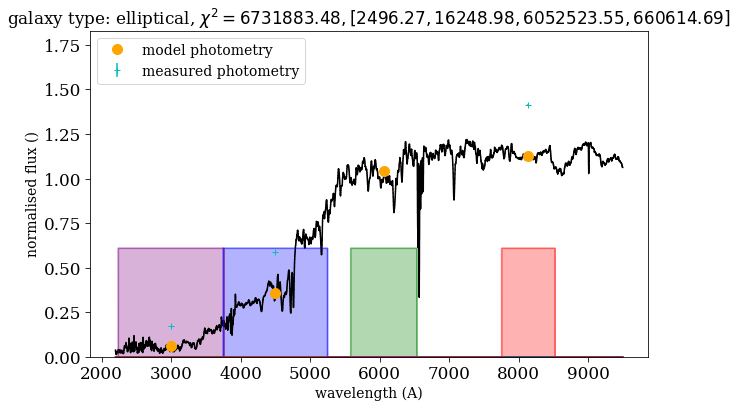

In [11]:
##### Comments of students #######################

##### Galaxy name: 1919.360
##### Galaxy morpholigical type: elliptical
##### Galaxy size in pixels: 20

##### Here the student can change the values #####

U = 93.530086
dU = 0.9

B = 319.48636
dB = 0.31

V = 1155.955166
dV = 0.14

I = 772.012731
dI = 0.13

galaxies=["elliptical", "S0", "Sa", "Sb", "sbt1", "sbt2", "sbt3", "sbt4", "sbt5", "sbt6"]
chimins=[]
zmins=[]
for galaxy_type in galaxies:
    chi_z=dict()
    for i in numpy.arange (0,1.0,0.05):
        redshift = i
        ##################################################

        # load the relevant galaxy
        path = "Spectra/%s.dat" % galaxy_type
        wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

        # apply a redshift transformation to the galaxy spectrum
        wl_redshifted = wl * (1 + redshift)

        # move to a common wavelength grid
        wl_small = numpy.arange(2200, 9500, 1)
        spec_small = numpy.interp(wl_small, wl_redshifted, spec)
        spec_small_norm = spec_small / numpy.median(spec_small)

        # plot the galaxy after the redshift transformation
        #plt.title("galaxy type: %s" % galaxy_type)
        #plt.step(wl_small, spec_small_norm, "k")
        #plt.xlabel("wavelength (A)")
        #plt.ylabel("normalised flux ()")

        # the filters do not move, so we can just plot them as they were
        max_value = numpy.max(spec_small_norm) * 0.5
        #for i in range(len(filters)):
            #plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
            #plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)


        # create the synthetic photometry according to this redshift
        syn_photometry = []
        for j in range(len(filters)):
            filter_arr = filters[j]
            syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
            syn_photometry.append(syn_phot)
        syn_photometry = numpy.array(syn_photometry)
        syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
        #plt.plot(filter_centers, syn_photometry_norm, "o", color="orange", markersize=10, label="model photometry")


        # plot the measured photometry
        meas_photo = numpy.array([U, B, V, I])
        meas_errs = numpy.array([dU, dB, dV, dI])

        meas_photo_norm = meas_photo / numpy.median(meas_photo)
        meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
        #plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


        # compute the chi-square of the fit
        residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
        residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
        chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
        #plt.title("galaxy type: %s, $\\chi^2 = %s, %s $" % (galaxy_type, numpy.round(chi_square, 2), residuals_st))

        #plt.legend(loc="best")

        #plt.ylim(0, max_value * 2 * 1.5)
        chi_z[redshift]=chi_square
    #print "z-min=",min(chi_z, key=chi_z.get), "Chi-min=", chi_z[min(chi_z, key=chi_z.get)]
    zmins.append(min(chi_z, key=chi_z.get))
    chimins.append(chi_z[min(chi_z, key=chi_z.get)])   
    
galaxy_type=galaxies[chimins.index(min(chimins))]
redshift = zmins[chimins.index(min(chimins))]
print ("galaxy type:",galaxy_type)
print ("redshift:",redshift)
print ("chi min:",min(chimins))

##################################################


# load the relevant galaxy
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)

# plot the galaxy after the redshift transformation
plt.title("galaxy type: %s" % galaxy_type)
plt.step(wl_small, spec_small_norm, "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalised flux ()")

# the filters do not move, so we can just plot them as they were
max_value = numpy.max(spec_small_norm) * 0.5
for i in range(len(filters)):
    plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
    plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
    
    
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


# plot the measured photometry
meas_photo = numpy.array([U, B, V, I])
meas_errs = numpy.array([dU, dB, dV, dI])

meas_photo_norm = meas_photo / numpy.median(meas_photo)
meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


# compute the chi-square of the fit
residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
plt.title("galaxy type: %s, $\\chi^2 = %s, %s $" % (galaxy_type, numpy.round(chi_square, 2), residuals_st))


plt.legend(loc="best")

plt.ylim(0, max_value * 2 * 1.5)

## Goal 5 (optional) - finding the redshift automatically for different galaxy templates 

This part of the notebook is for students that have a sceintific question that they want to explore, and have measured photometry for more than 6 galaxies. In this case, for each galaxy, you should find the best tempate and the code will automatically fit the photometry and extract the best-fiting redshift. This is different from Goal 4 in the sense that the redshift is found automatically and the students do not have to find it on their own. 
Finally, the cell prints the distance of the galaxy, which can be used to measure the luminosity of each galaxy.

In order to start a new cell with a new galaxy: 
1. Create a new cell by clicking on "Insert" -> "Insert Cell Below"
2. Copy the code from the previous cell to the new cell
3. Edit the properties of the galaxy and the photometry
4. Find the best redshift.

11 11 11 11
Best-fitting redshift:  0.06642147107720375
Best chi-square for the template:  230905.3772193484
luminosity distance in cm:  9.218997782986928e+26
galaxy:  elliptical
Best-fitting redshift:  0.01199700164794922
Best chi-square for the template:  236696.4771440065
luminosity distance in cm:  1.6001041549444085e+26
galaxy:  S0
Best-fitting redshift:  0.06101316916942595
Best chi-square for the template:  234921.781962686
luminosity distance in cm:  8.436068663971256e+26
galaxy:  Sa
Best-fitting redshift:  0.034012459075450904
Best chi-square for the template:  232310.51614270723
luminosity distance in cm:  4.6118690326828846e+26
galaxy:  Sb
Best-fitting redshift:  0.40847885754033925
Best chi-square for the template:  352021.32141325204
luminosity distance in cm:  6.870753387264498e+27
galaxy:  sbt1
Best-fitting redshift:  0.6210489141116617
Best chi-square for the template:  374134.7424735227
luminosity distance in cm:  1.1358988075477228e+28
galaxy:  sbt2
Best-fitting redsh

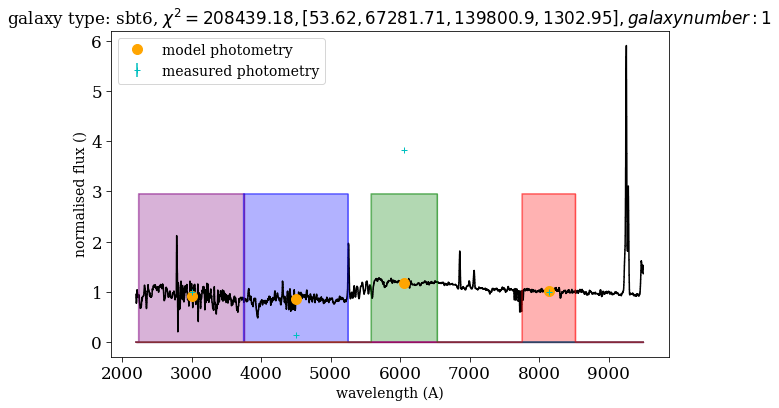

Best-fitting redshift:  0.7681777690172196
Best chi-square for the template:  281029.6918317613
luminosity distance in cm:  1.4729972701770536e+28
galaxy:  elliptical
Best-fitting redshift:  0.7439140801539186
Best chi-square for the template:  244784.21113125386
luminosity distance in cm:  1.4161073859029596e+28
galaxy:  S0
Best-fitting redshift:  0.7765539849426717
Best chi-square for the template:  426224.13372283406
luminosity distance in cm:  1.4927484511053236e+28
galaxy:  Sa
Best-fitting redshift:  0.7278827971023973
Best chi-square for the template:  672478.6907772698
luminosity distance in cm:  1.3787890065421197e+28
galaxy:  Sb


KeyboardInterrupt: 

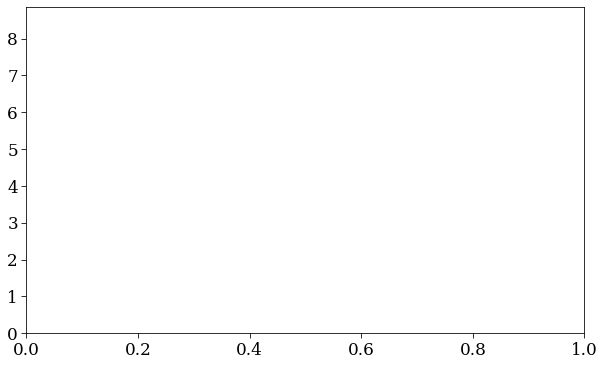

In [12]:
##### Comments of students #######################

##### Galaxy name: Shiny McPretty
##### Galaxy morpholigical type: spiral, has nice spiral arms
##### Galaxy size in pixels: 45

##### Here the student can change the values #####


##################################################
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import optimize
from astropy import units as u
from astropy import constants as c
from astropy import cosmology as cos
cosmo = cos.FlatLambdaCDM(H0=70, Om0=0.3)

def return_synthetic_photometry(spec):
    """
    the function returns the synthetic photometry for the given spectrum
    """
    # build the filters
    wl_filter_small = numpy.arange(2200, 9500, 1)
    filter_centers = numpy.array([3000, 4500, 6060, 8140])
    filter_widths = numpy.array([1521, 1501, 951, 766])/2
    filters = []
    for i in range(len(filter_centers)):
        center = filter_centers[i]
        width = filter_widths[i]
        filter_spec = numpy.zeros(len(wl_filter_small))
        filter_spec[(wl_filter_small >= (center - width)) & (wl_filter_small <= (center + width))] = 1.0
        filters.append(filter_spec)
        
    # calculate the synthetic photometry
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    
    return syn_photometry

def shift_spectrum_by_redshift(wl, spec, redshift):
    """
    the function shifts the spectrum according to the given redshift
    """
    wl_redshifted = wl * (1 + redshift)
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    return spec_small

def return_residuals(p, meas_photo, meas_photo_err, wl_template, spec_template):
    """
    function returns the residual of the fit, given the redshift and the template
    """
    redshift = p
    spec_template_shifted = shift_spectrum_by_redshift(wl_template, spec_template, redshift)
    syn_phot = return_synthetic_photometry(spec_template_shifted)
    syn_phot_norm = syn_phot / numpy.median(syn_phot)
    
    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_photo_err / numpy.median(meas_photo)
    
    chi_value = numpy.sum((meas_photo_norm - syn_phot_norm)**2/meas_photo_err_norm**2)
    return chi_value

def find_best_redshift(meas_photo, meas_photo_err, galaxy_type):
    """
    The function finds the optimal redshift for the given galaxy type and given photometry
    """
    # load the relevant galaxy
    path = "Spectra/%s.dat" % galaxy_type
    wl_template, spec_template = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    
    
    #out = minimize(return_residuals, p_in, args=(meas_photo, meas_photo_err, wl_template, spec_template), 
    #               bounds = [(0, 0.7),],  method='SLSQP')
    
    # do brute force optimization, the problem is not convex
    p_in = [0.3]
    rranges = [slice (0,0.7, 0.001)] #(0, 0.7, 0.001)]
    out = brute(return_residuals, rranges, args=(meas_photo, meas_photo_err, wl_template, spec_template), full_output=True, finish=optimize.fmin)
    
    p_out = out[0]
    best_redshift = p_out[0]
    
    # extract the chi square value for the best redshift
    chi_value = return_residuals(p_out, meas_photo, meas_photo_err, wl_template, spec_template)
    
    return best_redshift, chi_value
    
    
u = [[3.278329189905E-13, 2.21384330223213E-15],[1.9272862665385E-13, 1.86926991257538E-15],[1.4553693427665E-13, 1.47505157876207E-15],[1.13572753162225E-12, 3.89221574223791E-15],[8.78310015065E-15, 9.39288257332128E-16],[1.53255876318E-14, 3.4197869622444E-15],[6.61983590902E-14, 2.36098089285903E-15],[1.765748399955E-13, 2.90929415726936E-15],[1.4465328409369E-12, 6.24750926208039E-15],[8.546738315367E-13, 3.37871606821689E-15],[5.4473318363142E-13, 8.27924259186418E-15]]

b = [[4.508697796722E-14, 9.34756085621084E-16],[1.8984002980446E-13, 1.97765244576912E-15],[1.1374262766909E-13, 1.63498086297927E-15],[4.538648790018E-14, 8.85880718471852E-16],[1.880816454279E-14, 1.56494946074193E-15],[1.70677567984E-14, 6.33262110790013E-15],[1.240353028024E-13, 4.36538741641037E-15],[2.741047210616E-13, 8.43326156424496E-15],[6.176682262432E-13, 3.3877797130875E-15],[5.387285011592E-13, 6.23933687002724E-15],[6.391780973922E-13, 7.41336764441911E-14]]

v = [[1.2566480771592E-12, 2.28701566133137E-15],[7.23354049528E-14, 5.65745510415244E-16],[4.94135756048E-14, 4.53508524463241E-16],[7.651516687496E-13, 1.68568063924853E-15],[3.297304188992E-13, 3.03666011013318E-15],[5.753300233653E-14, 1.20580354270741E-14],[2.8601578938933E-13, 8.34411879227106E-15],[4.0862449400976E-13, 1.02971873284525E-14],[6.1784100510678E-13, 9.73430949664366E-15],[6.0589348833384E-13, 1.18977255092215E-14],[4.323693466048E-13, 2.02013511022543E-14]]

iGal = [[3.298416786724E-13, 4.49099925591983E-16],[1.3320509084939E-12, 9.30537702103276E-16],[1.0369783562553E-12, 8.76906663886685E-16],[2.17367517574172E-11, 3.44371166416404E-15],[1.8800066267432E-12, 2.7792287386168E-15],[1.851591793037E-13, 9.87829595416191E-15],[5.0840520377885E-13, 6.86923948845694E-15],[4.7848192210175E-13, 5.39598593358272E-15],[5.674142835914E-13, 1.19043824664038E-14],[5.605250050673E-13, 9.72613578409448E-15],[8.430643950085E-13, 8.8233939915731E-15]]

length = len(u)
print(len(u),len(b),len(v),len(iGal))
delta = 0.001
##################################################
for k in range(length):
    U = u[k][0]
    dU = u[k][1]
    
    V = v[k][0]
    dV = v[k][1]
    
    B = b[k][0]
    dB = b[k][1]
    
    I = iGal[k][0]
    dI = iGal[k][1]
    min_galaxy = "elliptical"
    min_best_redshift, min_chi_value = find_best_redshift(meas_photo, meas_errs, min_galaxy)
    galaxies=["elliptical", "S0", "Sa", "Sb", "sbt1", "sbt2", "sbt3", "sbt4", "sbt5", "sbt6"]
    for galaxy_type in galaxies:

        # step 1: find the best redshift
        meas_photo = numpy.array([U, B, V, I])
        meas_errs = numpy.array([dU, dB, dV, dI])

        best_redshift, chi_value = find_best_redshift(meas_photo, meas_errs, galaxy_type)
        print("Best-fitting redshift: ", best_redshift)#
        print("Best chi-square for the template: ", chi_value)#

        # step 2: calculate the luminosity distance
        dl = cosmo.luminosity_distance(best_redshift).cgs.value
        print("luminosity distance in cm: ", dl)#
        print("galaxy: ", galaxy_type)           #

        if(min_chi_value>chi_value):
            min_chi_value = chi_value
            min_best_redshift = best_redshift
            min_galaxy = galaxy_type


    print("..................................... BEST ...................................")
    print("Best-fitting redshift: ", min_best_redshift)
    print("Best chi-square for the template: ", min_chi_value)

    # step 2: calculate the luminosity distance
    min_dl = cosmo.luminosity_distance(min_best_redshift).cgs.value
    print("luminosity distance in cm: ", min_dl)
    print("galaxy: ", min_galaxy)

    # step 3: plot the best fit and the photometry

    # load the relevant galaxy
    path = "Spectra/%s.dat" % min_galaxy
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

    # apply a redshift transformation to the galaxy spectrum
    wl_redshifted = wl * (1 + min_best_redshift)

    # move to a common wavelength grid
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    spec_small_norm = spec_small / numpy.median(spec_small)

    # plot the galaxy after the redshift transformation
    plt.title("galaxy type: %s" % min_galaxy)
    plt.step(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalised flux ()")

    # the filters do not move, so we can just plot them as they were
    max_value = numpy.max(spec_small_norm) * 0.5
    for i in range(len(filters)):
        plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
        plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)


    # create the synthetic photometry according to this redshift
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
    plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


    # plot the measured photometry
    meas_photo = numpy.array([U, B, V, I])
    meas_errs = numpy.array([dU, dB, dV, dI])

    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
    plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


    # compute the chi-square of the fit
    residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
    residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
    chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
    plt.title("galaxy type: %s, $\\chi^2 = %s, %s , galaxy number: %d$" % (min_galaxy, numpy.round(chi_square, 2), residuals_st,k+1))


    plt.legend(loc="best")
    plt.show()

    plt.ylim(0, max_value * 2 * 1.5)

## Goal 6 (optional) - calculating color 

This part of the notebook is for students that have choosen a sceintific question that has to do with the color of the galaxy. The flux values you have measured are for the photons arriving to the telescop after being redshifted in redshift Z. Meaning - they were not originally amitted in the U/B/V/I wavelength's range. Since each galaxy is in different redshift, in order to compare colors we need to measure the flux that was truely emitted in the above bands. In order to do so we use the galaxy's template spectrum in Z=0 and measure the values from there:

1. Enter the correct galaxy type
2. Make sure Z = 0 (you can try other Z just to see how the values change)

From here you need to calculate the color (remember, these are flux values). You can read more about how to do this:
http://skinakas.physics.uoc.gr/en/files/projects/COLOR_in_ASTRONOMY_p3/P3_COLOURS_IN_ASTRONOMY.pdf


In [13]:
galaxy_type = 'elliptical'
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
redshift = 0
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
filter_centers, syn_photometry

U_flux = syn_photometry[0]
B_flux = syn_photometry[1]
V_flux = syn_photometry[2]
I_flux = syn_photometry[3]

print ('U_flux = ',U_mag)
print ('B_flux = ',B_mag)
print ('V_mag = ',V_mag)
print ('I_mag = ',I_mag)

NameError: name 'U_mag' is not defined

In [ ]:
##### Comments of students #######################

##### Galaxy name: Shiny McPretty
##### Galaxy morpholigical type: spiral, has nice spiral arms
##### Galaxy size in pixels: 45

##### Here the student can change the values #####


##################################################
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import optimize
from astropy import units as u
from astropy import constants as c
from astropy import cosmology as cos
cosmo = cos.FlatLambdaCDM(H0=70, Om0=0.3)

def return_synthetic_photometry(spec):
    """
    the function returns the synthetic photometry for the given spectrum
    """
    # build the filters
    wl_filter_small = numpy.arange(2200, 9500, 1)
    filter_centers = numpy.array([3000, 4500, 6060, 8140])
    filter_widths = numpy.array([1521, 1501, 951, 766])/2
    filters = []
    for i in range(len(filter_centers)):
        center = filter_centers[i]
        width = filter_widths[i]
        filter_spec = numpy.zeros(len(wl_filter_small))
        filter_spec[(wl_filter_small >= (center - width)) & (wl_filter_small <= (center + width))] = 1.0
        filters.append(filter_spec)
        
    # calculate the synthetic photometry
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    
    return syn_photometry

def shift_spectrum_by_redshift(wl, spec, redshift):
    """
    the function shifts the spectrum according to the given redshift
    """
    wl_redshifted = wl * (1 + redshift)
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    return spec_small

def return_residuals(p, meas_photo, meas_photo_err, wl_template, spec_template):
    """
    function returns the residual of the fit, given the redshift and the template
    """
    redshift = p
    spec_template_shifted = shift_spectrum_by_redshift(wl_template, spec_template, redshift)
    syn_phot = return_synthetic_photometry(spec_template_shifted)
    syn_phot_norm = syn_phot / numpy.median(syn_phot)
    
    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_photo_err / numpy.median(meas_photo)
    
    chi_value = numpy.sum((meas_photo_norm - syn_phot_norm)**2/meas_photo_err_norm**2)
    return chi_value

def find_best_redshift(meas_photo, meas_photo_err, galaxy_type):
    """
    The function finds the optimal redshift for the given galaxy type and given photometry
    """
    # load the relevant galaxy
    path = "Spectra/%s.dat" % galaxy_type
    wl_template, spec_template = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    
    
    #out = minimize(return_residuals, p_in, args=(meas_photo, meas_photo_err, wl_template, spec_template), 
    #               bounds = [(0, 0.7),],  method='SLSQP')
    
    # do brute force optimization, the problem is not convex
    p_in = [0.3]
    rranges = [slice (0,0.9, 0.0001)] #(0, 0.7, 0.001)]
    out = brute(return_residuals, rranges, args=(meas_photo, meas_photo_err, wl_template, spec_template), full_output=True, finish=optimize.fmin)
    
    p_out = out[0]
    best_redshift = p_out[0]
    
    # extract the chi square value for the best redshift
    chi_value = return_residuals(p_out, meas_photo, meas_photo_err, wl_template, spec_template)
    
    return best_redshift, chi_value
    
    
u = [[3.278329189905E-13, 2.21384330223213E-15],[1.9272862665385E-13, 1.86926991257538E-15],[1.4553693427665E-13, 1.47505157876207E-15],[1.13572753162225E-12, 3.89221574223791E-15],[8.78310015065E-15, 9.39288257332128E-16],[1.53255876318E-14, 3.4197869622444E-15],[6.61983590902E-14, 2.36098089285903E-15],[1.765748399955E-13, 2.90929415726936E-15],[1.4465328409369E-12, 6.24750926208039E-15],[8.546738315367E-13, 3.37871606821689E-15],[5.4473318363142E-13, 8.27924259186418E-15]]

b = [[4.508697796722E-14, 9.34756085621084E-16],[1.8984002980446E-13, 1.97765244576912E-15],[1.1374262766909E-13, 1.63498086297927E-15],[4.538648790018E-14, 8.85880718471852E-16],[1.880816454279E-14, 1.56494946074193E-15],[1.70677567984E-14, 6.33262110790013E-15],[1.240353028024E-13, 4.36538741641037E-15],[2.741047210616E-13, 8.43326156424496E-15],[6.176682262432E-13, 3.3877797130875E-15],[5.387285011592E-13, 6.23933687002724E-15],[6.391780973922E-13, 7.41336764441911E-14]]

v = [[1.2566480771592E-12, 2.28701566133137E-15],[7.23354049528E-14, 5.65745510415244E-16],[4.94135756048E-14, 4.53508524463241E-16],[7.651516687496E-13, 1.68568063924853E-15],[3.297304188992E-13, 3.03666011013318E-15],[5.753300233653E-14, 1.20580354270741E-14],[2.8601578938933E-13, 8.34411879227106E-15],[4.0862449400976E-13, 1.02971873284525E-14],[6.1784100510678E-13, 9.73430949664366E-15],[6.0589348833384E-13, 1.18977255092215E-14],[4.323693466048E-13, 2.02013511022543E-14]]

iGal = [[3.298416786724E-13, 4.49099925591983E-16],[1.3320509084939E-12, 9.30537702103276E-16],[1.0369783562553E-12, 8.76906663886685E-16],[2.17367517574172E-11, 3.44371166416404E-15],[1.8800066267432E-12, 2.7792287386168E-15],[1.851591793037E-13, 9.87829595416191E-15],[5.0840520377885E-13, 6.86923948845694E-15],[4.7848192210175E-13, 5.39598593358272E-15],[5.674142835914E-13, 1.19043824664038E-14],[5.605250050673E-13, 9.72613578409448E-15],[8.430643950085E-13, 8.8233939915731E-15]]

length = len(u)
print(len(u),len(b),len(v),len(iGal))
    
##################################################
for k in range(length):
    U = u[k][0]
    dU = u[k][1]
    
    V = v[k][0]
    dV = v[k][1]
    
    B = b[k][0]
    dB = b[k][1]
    
    I = iGal[k][0]
    dI = iGal[k][1]
    
    min_galaxy = "elliptical"
    
    meas_photo = numpy.array([U, B, V, I])
    meas_errs = numpy.array([dU, dB, dV, dI])
    
    min_best_redshift, min_chi_value = find_best_redshift(meas_photo, meas_errs, min_galaxy)
    
    galaxies=["elliptical", "S0", "Sa", "Sb", "sbt1", "sbt2", "sbt3", "sbt4", "sbt5", "sbt6"]
    
    for galaxy_type in galaxies:

        # step 1: find the best redshift
        meas_photo = numpy.array([U, B, V, I])
        meas_errs = numpy.array([dU, dB, dV, dI])
        

        best_redshift, chi_value = find_best_redshift(meas_photo, meas_errs, galaxy_type)
        print("Best-fitting redshift: ", best_redshift)#
        print("Best chi-square for the template: ", chi_value)#

        # step 2: calculate the luminosity distance
        dl = cosmo.luminosity_distance(best_redshift).cgs.value
        print("luminosity distance in cm: ", dl)#
        print("galaxy: ", galaxy_type)           #

        if(min_chi_value>chi_value):
            min_chi_value = chi_value
            min_best_redshift = best_redshift
            min_galaxy = galaxy_type


    print("..................................... BEST ...................................")
    print("Best-fitting redshift: ", min_best_redshift)
    print("Best chi-square for the template: ", min_chi_value)

    # step 2: calculate the luminosity distance
    min_dl = cosmo.luminosity_distance(min_best_redshift).cgs.value
    print("luminosity distance in cm: ", min_dl)
    print("galaxy: ", min_galaxy)

    # step 3: plot the best fit and the photometry

    # load the relevant galaxy
    path = "Spectra/%s.dat" % min_galaxy
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

    # apply a redshift transformation to the galaxy spectrum
    wl_redshifted = wl * (1 + min_best_redshift)

    # move to a common wavelength grid
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    spec_small_norm = spec_small / numpy.median(spec_small)

    # plot the galaxy after the redshift transformation
    plt.title("galaxy type: %s" % min_galaxy)
    plt.step(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalised flux ()")

    # the filters do not move, so we can just plot them as they were
    max_value = numpy.max(spec_small_norm) * 0.5
    for i in range(len(filters)):
        plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
        plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)


    # create the synthetic photometry according to this redshift
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
    plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


    # plot the measured photometry
    meas_photo = numpy.array([U, B, V, I])
    meas_errs = numpy.array([dU, dB, dV, dI])

    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
    plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


    # compute the chi-square of the fit
    residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
    residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
    chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
    plt.title("galaxy type: %s, $\\chi^2 = %s, %s , galaxy number: %d$" % (min_galaxy, numpy.round(chi_square, 2), residuals_st,k+1))


    plt.legend(loc="best")
    plt.show()

    plt.ylim(0, max_value * 2 * 1.5)

In [15]:
##### Comments of students #######################

##### Galaxy name: Shiny McPretty
##### Galaxy morpholigical type: spiral, has nice spiral arms
##### Galaxy size in pixels: 45

##### Here the student can change the values #####

[[1.2566480771592E-12, 2.28701566133137E-15],[7.23354049528E-14, 5.65745510415244E-16],[4.94135756048E-14, 4.53508524463241E-16],[7.651516687496E-13, 1.68568063924853E-15],[3.297304188992E-13, 3.03666011013318E-15],[5.753300233653E-14, 1.20580354270741E-14],[2.8601578938933E-13, 8.34411879227106E-15],[4.0862449400976E-13, 1.02971873284525E-14],[6.1784100510678E-13, 9.73430949664366E-15],[6.0589348833384E-13, 1.18977255092215E-14],[4.323693466048E-13, 2.02013511022543E-14]]

##################################################
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import optimize
from astropy import units as u
from astropy import constants as c
from astropy import cosmology as cos
cosmo = cos.FlatLambdaCDM(H0=70, Om0=0.3)

def return_synthetic_photometry(spec):
    """
    the function returns the synthetic photometry for the given spectrum
    """
    # build the filters
    wl_filter_small = numpy.arange(2200, 9500, 1)
    filter_centers = numpy.array([3000, 4500, 6060, 8140])
    filter_widths = numpy.array([1521, 1501, 951, 766])/2
    filters = []
    for i in range(len(filter_centers)):
        center = filter_centers[i]
        width = filter_widths[i]
        filter_spec = numpy.zeros(len(wl_filter_small))
        filter_spec[(wl_filter_small >= (center - width)) & (wl_filter_small <= (center + width))] = 1.0
        filters.append(filter_spec)
        
    # calculate the synthetic photometry
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    
    return syn_photometry

def shift_spectrum_by_redshift(wl, spec, redshift):
    """
    the function shifts the spectrum according to the given redshift
    """
    wl_redshifted = wl * (1 + redshift)
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    return spec_small

def return_residuals(p, meas_photo, meas_photo_err, wl_template, spec_template):
    """
    function returns the residual of the fit, given the redshift and the template
    """
    redshift = p
    spec_template_shifted = shift_spectrum_by_redshift(wl_template, spec_template, redshift)
    syn_phot = return_synthetic_photometry(spec_template_shifted)
    syn_phot_norm = syn_phot / numpy.median(syn_phot)
    
    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_photo_err / numpy.median(meas_photo)
    
    chi_value = numpy.sum((meas_photo_norm - syn_phot_norm)**2/meas_photo_err_norm**2)
    return chi_value

def find_best_redshift(meas_photo, meas_photo_err, galaxy_type):
    """
    The function finds the optimal redshift for the given galaxy type and given photometry
    """
    # load the relevant galaxy
    path = "Spectra/%s.dat" % galaxy_type
    wl_template, spec_template = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    
    
    #out = minimize(return_residuals, p_in, args=(meas_photo, meas_photo_err, wl_template, spec_template), 
    #               bounds = [(0, 0.7),],  method='SLSQP')
    
    # do brute force optimization, the problem is not convex
    p_in = [0.3]
    rranges = [slice (0,0.9, 0.00001)] #(0, 0.7, 0.001)]
    out = brute(return_residuals, rranges, args=(meas_photo, meas_photo_err, wl_template, spec_template), full_output=True, finish=optimize.fmin)
    
    p_out = out[0]
    best_redshift = p_out[0]
    
    # extract the chi square value for the best redshift
    chi_value = return_residuals(p_out, meas_photo, meas_photo_err, wl_template, spec_template)
    
    return best_redshift, chi_value
    
    
u = [[8.015180345931E-12, 2.21384330223213E-15],[4.7120182598227E-12, 1.86926991257538E-15],[3.5582295359883E-12, 1.47505157876207E-15],[2.77673792425195E-11, 3.89221574223791E-15],[2.147378363363E-13, 9.39288257332128E-16],[1.53255876318E-14, 3.4197869622444E-15],[6.61983590902E-14, 2.36098089285903E-15],[1.765748399955E-13, 2.90929415726936E-15],[1.4465328409369E-12, 6.24750926208039E-15],[8.546738315367E-13, 3.37871606821689E-15],[5.4473318363142E-13, 8.27924259186418E-15]]

b = [[2.099287863024E-13, 9.34756085621084E-16],[8.839112498832E-13, 1.97765244576912E-15],[5.295953034328E-13, 1.63498086297927E-15],[2.113233299056E-13, 8.85880718471852E-16],[8.75724063368E-14, 1.56494946074193E-15],[1.70677567984E-14, 6.33262110790013E-15],[1.240353028024E-13, 4.36538741641037E-15],[2.741047210616E-13, 8.43326156424496E-15],[6.176682262432E-13, 3.3877797130875E-15],[5.387285011592E-13, 6.23933687002724E-15],[6.391780973922E-13, 7.41336764441911E-14]]

v = [[2.6989373475351E-13, 2.28701566133137E-15],[1.553567220009E-14, 5.65745510415244E-16],[1.061268839694E-14, 4.53508524463241E-16],[1.6433371067463E-13, 1.68568063924853E-15],[7.081710133176E-14, 3.03666011013318E-15],[5.753300233653E-14, 1.20580354270741E-14],[2.8601578938933E-13, 8.34411879227106E-15],[4.0862449400976E-13, 1.02971873284525E-14],[6.1784100510678E-13, 9.73430949664366E-15],[6.0589348833384E-13, 1.18977255092215E-14],[4.323693466048E-13, 2.02013511022543E-14]]

iGal = [[1.34910202462E-14, 4.49099925591983E-16],[5.448288356945E-14, 9.30537702103276E-16],[4.241397283515E-14, 8.76906663886685E-16],[8.890658064386E-13, 3.44371166416404E-15],[7.68950957516E-14, 2.7792287386168E-15],[1.851591793037E-13, 9.87829595416191E-15],[5.0840520377885E-13, 6.86923948845694E-15],[4.7848192210175E-13, 5.39598593358272E-15],[5.674142835914E-13, 1.19043824664038E-14],[5.605250050673E-13, 9.72613578409448E-15],[8.430643950085E-13, 8.8233939915731E-15]]

length = len(u)
print(len(u),len(b),len(v),len(iGal))
    
##################################################
for k in range(length):
    U = u[k][0]
    dU = u[k][1]
    
    V = v[k][0]
    dV = v[k][1]
    
    B = b[k][0]
    dB = b[k][1]
    
    I = iGal[k][0]
    dI = iGal[k][1]
    
    min_galaxy = "elliptical"
    
    meas_photo = numpy.array([U, B, V, I])
    meas_errs = numpy.array([dU, dB, dV, dI])
    
    min_best_redshift, min_chi_value = find_best_redshift(meas_photo, meas_errs, min_galaxy)
    
    galaxies=["elliptical", "S0", "Sa", "Sb", "sbt1", "sbt2", "sbt3", "sbt4", "sbt5", "sbt6"]
    
    for galaxy_type in galaxies:

        # step 1: find the best redshift
        meas_photo = numpy.array([U, B, V, I])
        meas_errs = numpy.array([dU, dB, dV, dI])
        

        best_redshift, chi_value = find_best_redshift(meas_photo, meas_errs, galaxy_type)
        print("Best-fitting redshift: ", best_redshift)#
        print("Best chi-square for the template: ", chi_value)#

        # step 2: calculate the luminosity distance
        dl = cosmo.luminosity_distance(best_redshift).cgs.value
        print("luminosity distance in cm: ", dl)#
        print("galaxy: ", galaxy_type)           #

        if(min_chi_value>chi_value):
            min_chi_value = chi_value
            min_best_redshift = best_redshift
            min_galaxy = galaxy_type


    print("..................................... BEST ...................................")
    print("Best-fitting redshift: ", min_best_redshift)
    print("Best chi-square for the template: ", min_chi_value)

    # step 2: calculate the luminosity distance
    min_dl = cosmo.luminosity_distance(min_best_redshift).cgs.value
    print("luminosity distance in cm: ", min_dl)
    print("galaxy: ", min_galaxy)

    # step 3: plot the best fit and the photometry

    # load the relevant galaxy
    path = "Spectra/%s.dat" % min_galaxy
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

    # apply a redshift transformation to the galaxy spectrum
    wl_redshifted = wl * (1 + min_best_redshift)

    # move to a common wavelength grid
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    spec_small_norm = spec_small / numpy.median(spec_small)

    # plot the galaxy after the redshift transformation
    plt.title("galaxy type: %s" % min_galaxy)
    plt.step(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalised flux ()")

    # the filters do not move, so we can just plot them as they were
    max_value = numpy.max(spec_small_norm) * 0.5
    for i in range(len(filters)):
        plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
        plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)


    # create the synthetic photometry according to this redshift
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
    plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


    # plot the measured photometry
    meas_photo = numpy.array([U, B, V, I])
    meas_errs = numpy.array([dU, dB, dV, dI])

    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
    plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


    # compute the chi-square of the fit
    residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
    residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
    chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
    plt.title("galaxy type: %s, $\\chi^2 = %s, %s , galaxy number: %d$" % (min_galaxy, numpy.round(chi_square, 2), residuals_st,k+1))


    plt.legend(loc="best")
    plt.show()

    plt.ylim(0, max_value * 2 * 1.5)

11 11 11 11


KeyboardInterrupt: 

11 11 11 11
Best-fitting redshift:  0.026609296989440923
Best chi-square for the template:  3604.2729716750546
luminosity distance in cm:  3.588303900974627e+26
galaxy:  elliptical
116.28900966602103 Mpc
Best-fitting redshift:  0.030931210708618158
Best chi-square for the template:  3355.0073673628494
luminosity distance in cm:  4.184534100439331e+26
galaxy:  S0
135.61151448783738 Mpc
Best-fitting redshift:  0.02517908477783203
Best chi-square for the template:  2994.46230567422
luminosity distance in cm:  3.391816782480674e+26
galaxy:  Sa
109.92129582339312 Mpc
Best-fitting redshift:  0.03294933128356933
Best chi-square for the template:  2282.6011886576393
luminosity distance in cm:  4.4642128513564486e+26
galaxy:  Sb
144.67528552460703 Mpc
Best-fitting redshift:  0.017869558715820313
Best chi-square for the template:  4911.805129234206
luminosity distance in cm:  2.3939928604605993e+26
galaxy:  sbt1
77.58402481319169 Mpc
Best-fitting redshift:  0.03415088093280794
Best chi-square fo

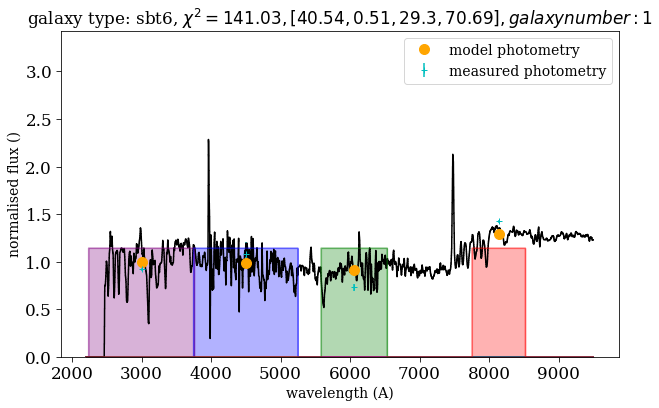

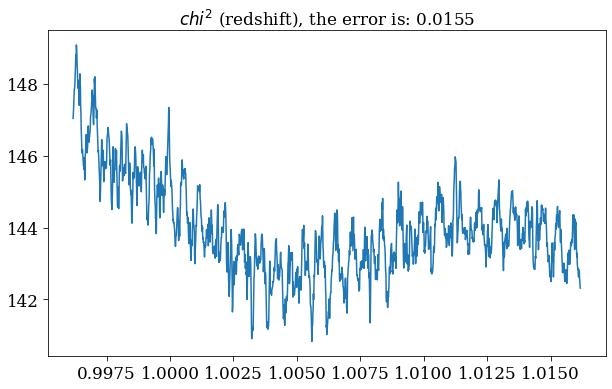

Best-fitting redshift:  0.005982925415039062
Best chi-square for the template:  51800.65785641251
luminosity distance in cm:  7.943129260312287e+25
galaxy:  elliptical
25.74192880040128 Mpc
Best-fitting redshift:  0.006035192871093749
Best chi-square for the template:  50245.215315149326
luminosity distance in cm:  8.012842959703816e+25
galaxy:  S0
25.967855513581664 Mpc
Best-fitting redshift:  -0.00029579925537109386
Best chi-square for the template:  45285.467106324264
luminosity distance in cm:  -3.9081453111697656e+24
galaxy:  Sa
-1.266543638467731 Mpc
Best-fitting redshift:  1.1406221106994896
Best chi-square for the template:  15621.410744979188
luminosity distance in cm:  2.3992956196932897e+28
galaxy:  Sb
7775.587553617516 Mpc
Best-fitting redshift:  0.10993709224462514
Best chi-square for the template:  1176.1586179138405
luminosity distance in cm:  1.5718441887801972e+27
galaxy:  sbt1
509.4000093272252 Mpc
Best-fitting redshift:  0.015008548736572265
Best chi-square for the t

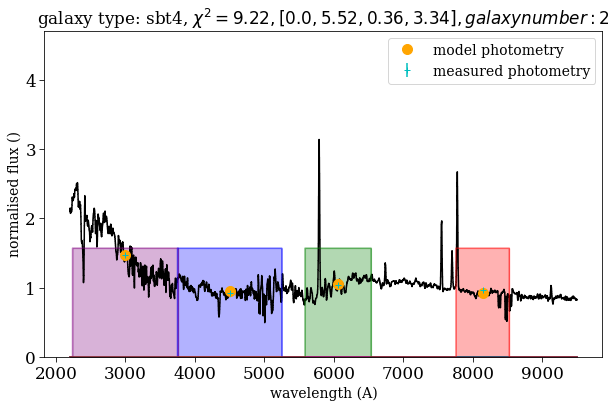

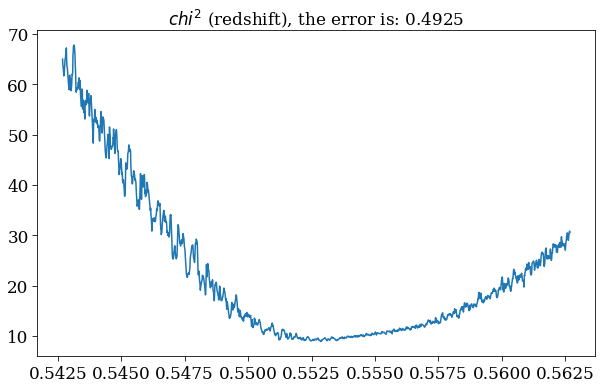

Best-fitting redshift:  0.0002169952392578125
Best chi-square for the template:  47507.710300719
luminosity distance in cm:  2.8681141892825684e+24
galaxy:  elliptical
0.9294925064461286 Mpc
Best-fitting redshift:  0.0004803423881530762
Best chi-square for the template:  46883.21248086477
luminosity distance in cm:  6.350175621345054e+24
galaxy:  S0
2.057951763815079 Mpc
Best-fitting redshift:  0.0003839216232299804
Best chi-square for the template:  43904.937006291264
luminosity distance in cm:  5.075104208764353e+24
galaxy:  Sa
1.6447292611664306 Mpc
Best-fitting redshift:  1.1406229507282384
Best chi-square for the template:  25792.820527962314
luminosity distance in cm:  2.399297806312478e+28
galaxy:  Sb
7775.594639967695 Mpc
Best-fitting redshift:  0.5859867551803589
Best chi-square for the template:  468.41866288381414
luminosity distance in cm:  1.0585266344194472e+28
galaxy:  sbt1
3430.451194178668 Mpc
Best-fitting redshift:  0.6549785620689392
Best chi-square for the template:

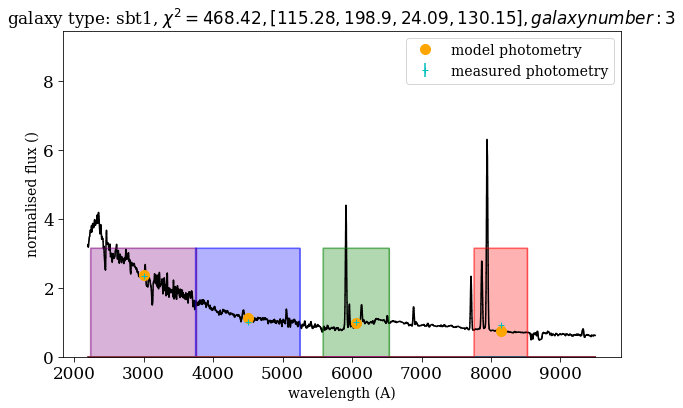

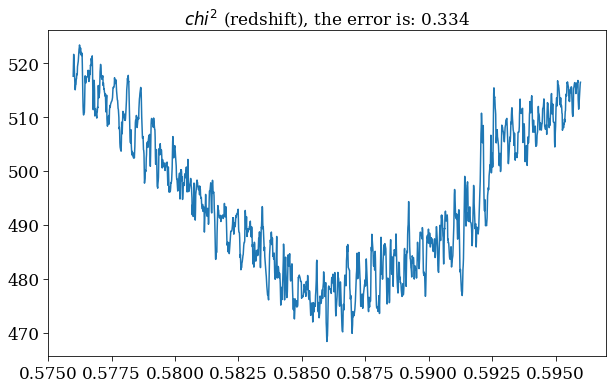

Best-fitting redshift:  0.030991627502441402
Best chi-square for the template:  2199.063870246727
luminosity distance in cm:  4.1928951783759325e+26
galaxy:  elliptical
135.8824785699832 Mpc
Best-fitting redshift:  0.026254272460937506
Best chi-square for the template:  1913.29167501076
luminosity distance in cm:  3.539491478861136e+26
galaxy:  S0
114.70710679947845 Mpc
Best-fitting redshift:  0.025186120605468754
Best chi-square for the template:  1458.5504146812605
luminosity distance in cm:  3.39278238923228e+26
galaxy:  Sa
109.9525890070169 Mpc
Best-fitting redshift:  0.13797568559646609
Best chi-square for the template:  706.6093453209186
luminosity distance in cm:  2.0089246897678334e+27
galaxy:  Sb
651.0481528704048 Mpc
Best-fitting redshift:  0.013000357055664064
Best chi-square for the template:  14549.610376325101
luminosity distance in cm:  1.7352511678371973e+26
galaxy:  sbt1
56.23566046754996 Mpc
Best-fitting redshift:  0.015009706020355224
Best chi-square for the template

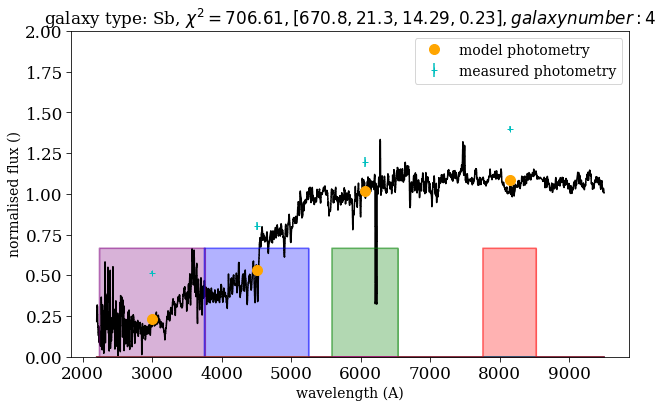

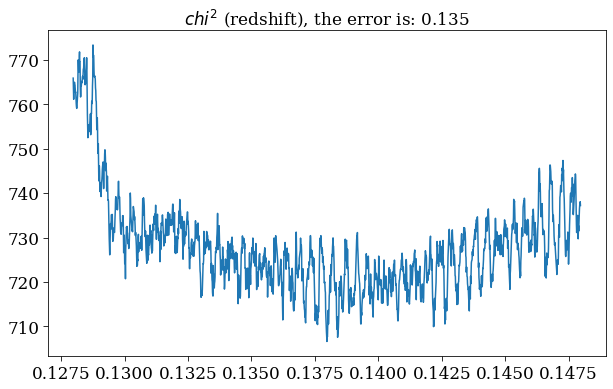

Best-fitting redshift:  0.41803783054351806
Best chi-square for the template:  459.66400239994175
luminosity distance in cm:  7.061413749843324e+27
galaxy:  elliptical
2288.448343486921 Mpc
Best-fitting redshift:  0.40973649687767033
Best chi-square for the template:  401.2114401573893
luminosity distance in cm:  6.895772397456241e+27
galaxy:  S0
2234.767637057339 Mpc
Best-fitting redshift:  0.5417002716064454
Best chi-square for the template:  36.1003663946226
luminosity distance in cm:  9.625823794787941e+27
galaxy:  Sa
3119.517039823393 Mpc
Best-fitting redshift:  0.5199951369762421
Best chi-square for the template:  163.82900814556626
luminosity distance in cm:  9.163169709281216e+27
galaxy:  Sb
2969.5810619735166 Mpc
Best-fitting redshift:  0.012998622608184815
Best chi-square for the template:  13341.676371496214
luminosity distance in cm:  1.735017370796503e+26
galaxy:  sbt1
56.22808362147575 Mpc
Best-fitting redshift:  0.015009706020355224
Best chi-square for the template:  153

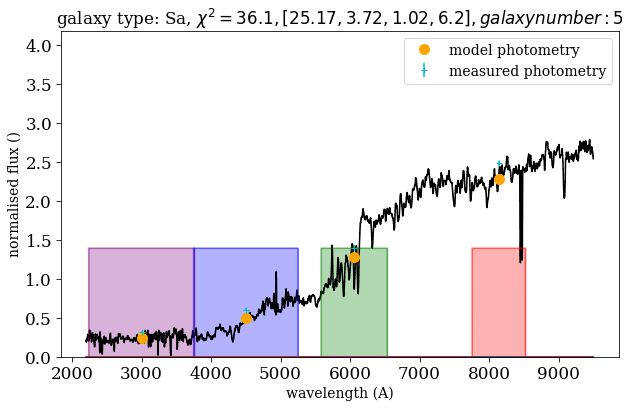

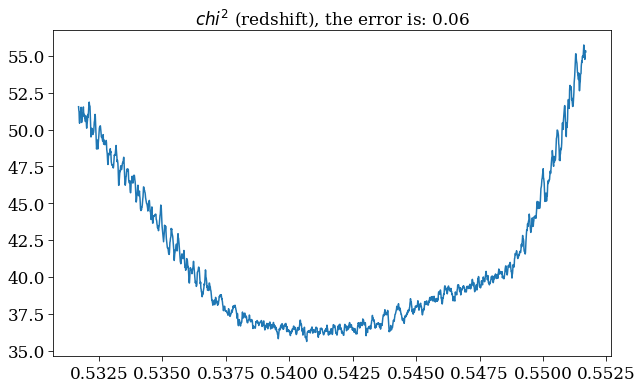

Best-fitting redshift:  0.8553796463012695
Best chi-square for the template:  3.0721967630040807
luminosity distance in cm:  1.6813156185081798e+28
galaxy:  elliptical
5448.772835523342 Mpc
Best-fitting redshift:  0.8816559330940246
Best chi-square for the template:  3.4217092315401767
luminosity distance in cm:  1.7452114770657446e+28
galaxy:  S0
5655.845210619586 Mpc
Best-fitting redshift:  0.774697265625
Best chi-square for the template:  6.538780105473886
luminosity distance in cm:  1.4883653981286131e+28
galaxy:  Sa
4823.463757418617 Mpc
Best-fitting redshift:  0.7219960752487182
Best chi-square for the template:  51.85004834251707
luminosity distance in cm:  1.3651403989120425e+28
galaxy:  Sb
4424.118732012628 Mpc
Best-fitting redshift:  0.013000317382812501
Best chi-square for the template:  424.91588764491877
luminosity distance in cm:  1.7352458200783924e+26
galaxy:  sbt1
56.235487158490166 Mpc
Best-fitting redshift:  0.015009704589843749
Best chi-square for the template:  452

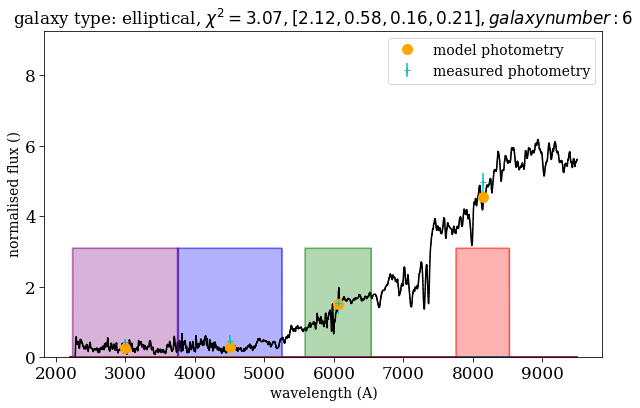

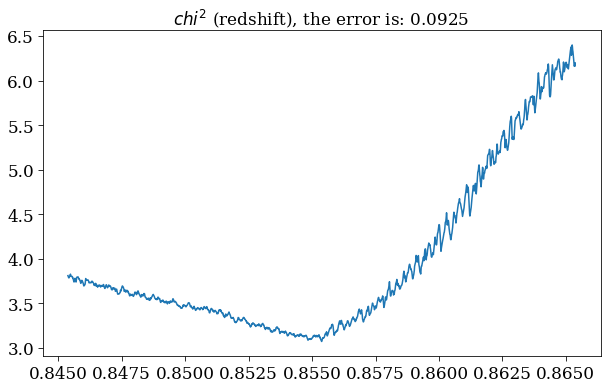

Best-fitting redshift:  0.00022021484374999998
Best chi-square for the template:  46657.69114202689
luminosity distance in cm:  2.9106762695393103e+24
galaxy:  elliptical
0.9432859372674085 Mpc
Best-fitting redshift:  0.0004803428649902344
Best chi-square for the template:  45908.10474985487
luminosity distance in cm:  6.350181927540813e+24
galaxy:  S0
2.05795380751394 Mpc
Best-fitting redshift:  -0.00024740409851074216
Best chi-square for the template:  43472.95007587746
luminosity distance in cm:  -3.268863696377524e+24
galaxy:  Sa
-1.059366576731983 Mpc
Best-fitting redshift:  1.143074881482124
Best chi-square for the template:  25095.157416137376
luminosity distance in cm:  2.405681893042697e+28
galaxy:  Sb
7796.284056025168 Mpc
Best-fitting redshift:  0.7243964190959928
Best chi-square for the template:  106.29085392393651
luminosity distance in cm:  1.3707021148689206e+28
galaxy:  sbt1
4442.143025899592 Mpc
Best-fitting redshift:  0.7580206779032947
Best chi-square for the templa

/home/tal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide
/home/tal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


the error is:  0.9949999999999763
The second order derevative is:  916131.4366845198 the delta is:  0.3333333333333333
1.0683890670127934e-14


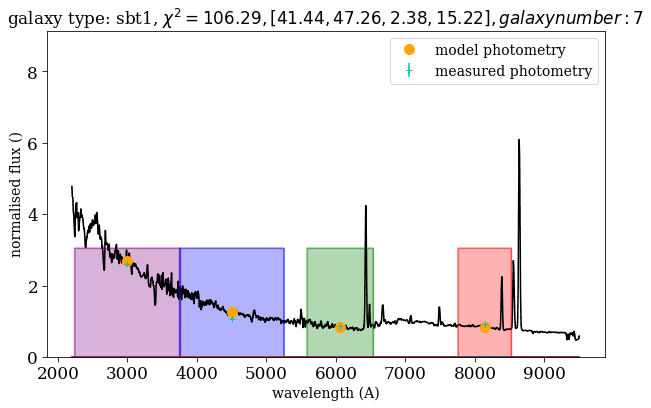

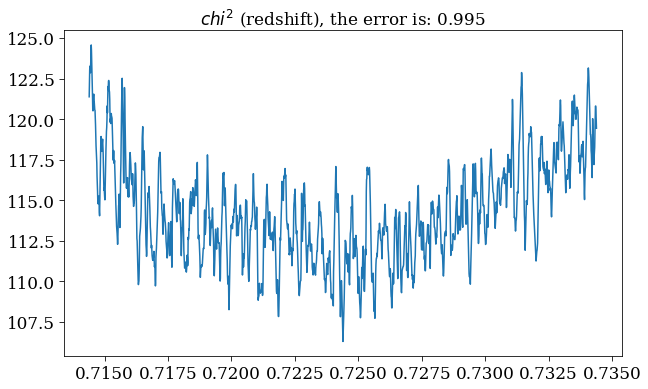

Best-fitting redshift:  0.004107866954803467
Best chi-square for the template:  120025.3078958914
luminosity distance in cm:  5.4458791571539e+25
galaxy:  elliptical
17.64889238545937 Mpc
Best-fitting redshift:  0.00017944514751434322
Best chi-square for the template:  116006.24297098894
luminosity distance in cm:  2.3717303780773926e+24
galaxy:  S0
0.7686254689479487 Mpc
Best-fitting redshift:  0.00600515413284302
Best chi-square for the template:  107370.47936732863
luminosity distance in cm:  7.972776975187144e+25
galaxy:  Sa
25.838010500747817 Mpc
Best-fitting redshift:  1.102876663208008e-05
Best chi-square for the template:  91282.02906184393
luminosity distance in cm:  1.4574842397748765e+23
galaxy:  Sb
0.04723384738990991 Mpc
Best-fitting redshift:  0.41219537548422813
Best chi-square for the template:  36617.10625549061
luminosity distance in cm:  6.944745872342277e+27
galaxy:  sbt1
2250.6388593717425 Mpc
Best-fitting redshift:  0.4694409013576804
Best chi-square for the templ

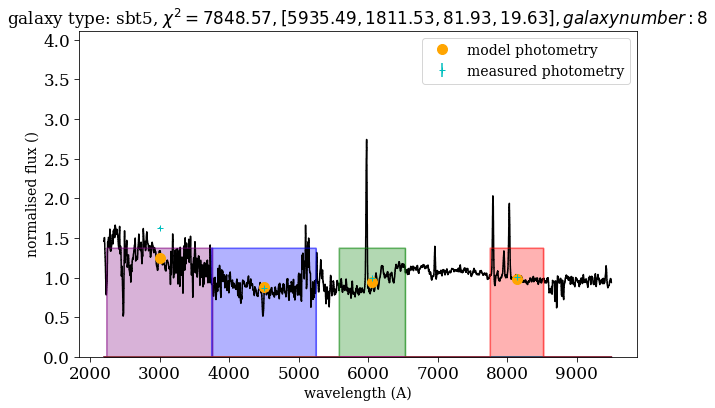

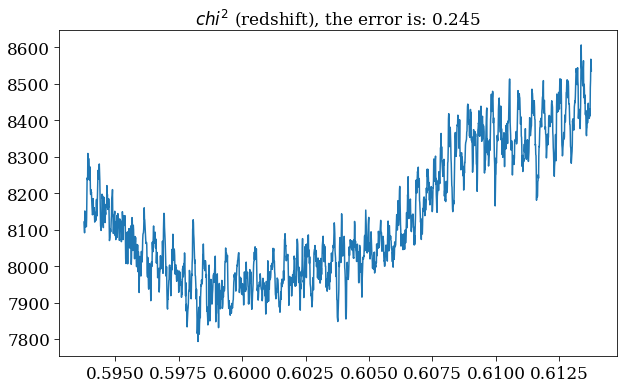

Best-fitting redshift:  -0.17944686996936812
Best chi-square for the template:  46015.105995965474
luminosity distance in cm:  -2.0207540644685976e+27
galaxy:  elliptical
-654.8817921241663 Mpc
Best-fitting redshift:  0.00024932175874710084
Best chi-square for the template:  59951.76468761852
luminosity distance in cm:  3.295469455744781e+24
galaxy:  S0
1.0679889161257854 Mpc
Best-fitting redshift:  0.002994712400436401
Best chi-square for the template:  57094.05465767342
luminosity distance in cm:  3.966742894718691e+25
galaxy:  Sa
12.855338219855641 Mpc
Best-fitting redshift:  -0.00025921249389648435
Best chi-square for the template:  51732.2068144869
luminosity distance in cm:  -3.4248525340491326e+24
galaxy:  Sb
-1.109919116183444 Mpc
Best-fitting redshift:  0.9175097597122195
Best chi-square for the template:  1776.4014877942002
luminosity distance in cm:  1.8331908824260906e+28
galaxy:  sbt1
5940.96704541126 Mpc
Best-fitting redshift:  1.0120470325648783
Best chi-square for the t

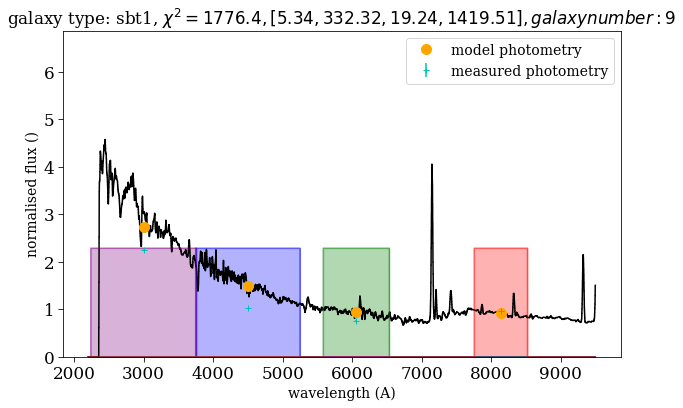

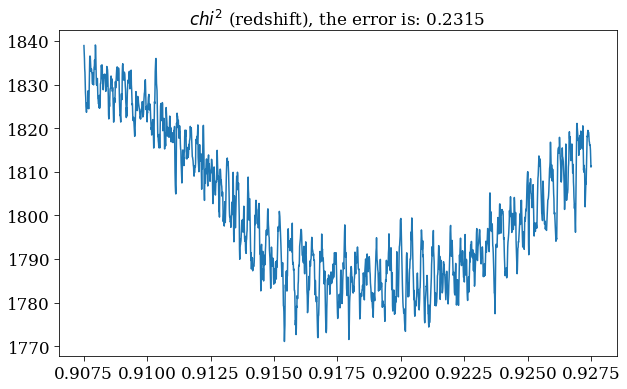

Best-fitting redshift:  0.00018590831756591796
Best chi-square for the template:  64875.508966786176
luminosity distance in cm:  2.4571665402738394e+24
galaxy:  elliptical
0.7963134434497512 Mpc
Best-fitting redshift:  0.00024932193756103515
Best chi-square for the template:  64231.876473537566
luminosity distance in cm:  3.295471819705725e+24
galaxy:  S0
1.0679896822333523 Mpc
Best-fitting redshift:  0.001106542205810547
Best chi-square for the template:  60622.24806516531
luminosity distance in cm:  1.463569412786465e+25
galaxy:  Sa
4.743105441659788 Mpc
Best-fitting redshift:  -0.0008904261589050294
Best chi-square for the template:  54809.189346510844
luminosity distance in cm:  -1.1759022530762138e+25
galaxy:  Sb
-3.810839668210217 Mpc
Best-fitting redshift:  0.6520044890731573
Best chi-square for the template:  4361.322154394563
luminosity distance in cm:  1.2052004994409859e+28
galaxy:  sbt1
3905.788818246953 Mpc
Best-fitting redshift:  0.6799526482732036
Best chi-square for the

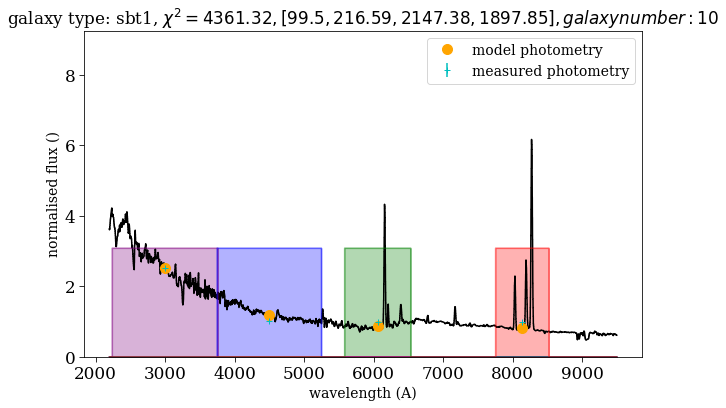

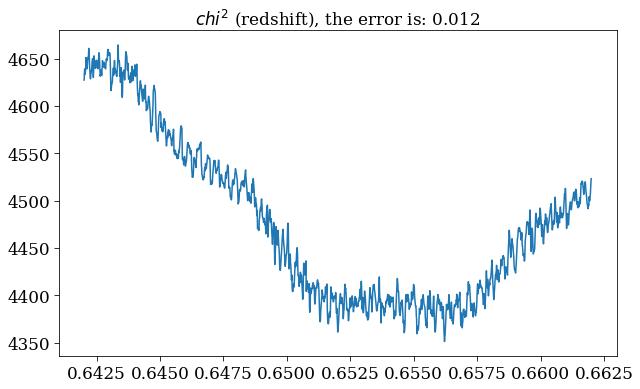

Best-fitting redshift:  0.0196932668685913
Best chi-square for the template:  21243.433871512483
luminosity distance in cm:  2.641945420045561e+26
galaxy:  elliptical
85.61962001193129 Mpc
Best-fitting redshift:  0.0004803426265716553
Best chi-square for the template:  20179.2748890689
luminosity distance in cm:  6.350178774447588e+24
galaxy:  S0
2.057952785666018 Mpc
Best-fitting redshift:  0.024159101724624637
Best chi-square for the template:  18349.555225496875
luminosity distance in cm:  3.251937360618552e+26
galaxy:  Sa
105.38811248945544 Mpc
Best-fitting redshift:  0.011205929386615757
Best chi-square for the template:  15127.43859577609
luminosity distance in cm:  1.4936941589422128e+26
galaxy:  Sb
48.407330951018686 Mpc
Best-fitting redshift:  0.6957159995019437
Best chi-square for the template:  95020.50419913023
luminosity distance in cm:  1.304574740079877e+28
galaxy:  sbt1
4227.838799216255 Mpc
Best-fitting redshift:  0.6799377607863397
Best chi-square for the template:  1

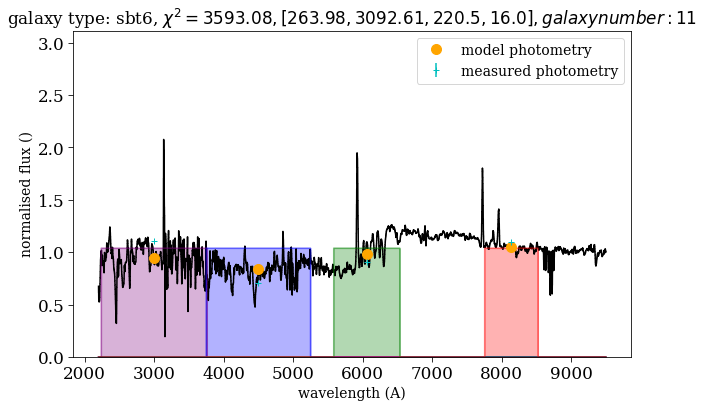

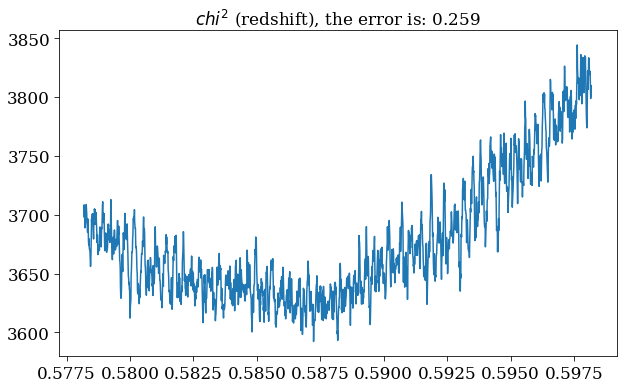

In [139]:
##### Comments of students #######################

##### Galaxy name: Shiny McPretty
##### Galaxy morpholigical type: spiral, has nice spiral arms
##### Galaxy size in pixels: 45

##### Here the student can change the values #####


##################################################
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import optimize
from astropy import units as u
from astropy import constants as c
from astropy import cosmology as cos
cosmo = cos.FlatLambdaCDM(H0=70, Om0=0.3)

#speed of light
speed_of_light = c.c.to('cm/s').value

def return_synthetic_photometry(spec):
    """
    the function returns the synthetic photometry for the given spectrum
    """
    # build the filters
    wl_filter_small = numpy.arange(2200, 9500, 1)
    filter_centers = numpy.array([3000, 4500, 6060, 8140])
    filter_widths = numpy.array([1521, 1501, 951, 766])/2
    filters = []
    for i in range(len(filter_centers)):
        center = filter_centers[i]
        width = filter_widths[i]
        filter_spec = numpy.zeros(len(wl_filter_small))
        filter_spec[(wl_filter_small >= (center - width)) & (wl_filter_small <= (center + width))] = 1.0
        filters.append(filter_spec)
        
    # calculate the synthetic photometry
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    
    return syn_photometry

def shift_spectrum_by_redshift(wl, spec, redshift):
    """
    the function shifts the spectrum according to the given redshift
    """
    wl_redshifted = wl * (1 + redshift)
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    return spec_small

def return_residuals(p, meas_photo, meas_photo_err, wl_template, spec_template):
    """
    function returns the residual of the fit, given the redshift and the template
    """
    redshift = p
    spec_template_shifted = shift_spectrum_by_redshift(wl_template, spec_template, redshift)
    syn_phot = return_synthetic_photometry(spec_template_shifted)
    syn_phot_norm = syn_phot / numpy.median(syn_phot)
    
    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_photo_err / numpy.median(meas_photo)
    
    chi_value = numpy.sum((meas_photo_norm - syn_phot_norm)**2/meas_photo_err_norm**2)
    return chi_value

def find_best_redshift(meas_photo, meas_photo_err, galaxy_type, delta):
    """
    The function finds the optimal redshift for the given galaxy type and given photometry
    """
    # load the relevant galaxy
    path = "Spectra/%s.dat" % galaxy_type
    wl_template, spec_template = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    
    
    #out = minimize(return_residuals, p_in, args=(meas_photo, meas_photo_err, wl_template, spec_template), 
    #               bounds = [(0, 0.7),],  method='SLSQP')
    
    # do brute force optimization, the problem is not convex
    p_in = [0.3]
    delta = 0.001
    rranges = [slice (0,0.9, delta)] #(0, 0.7, 0.001)]
    out = brute(return_residuals, rranges, args=(meas_photo, meas_photo_err, wl_template, spec_template), full_output=True, finish=optimize.fmin)
    
    p_out = out[0]
    best_redshift = p_out[0]
    
    # extract the chi square value for the best redshift
    chi_value = return_residuals(p_out, meas_photo, meas_photo_err, wl_template, spec_template)
    
    return best_redshift, chi_value
    
    
u = [[3.298416786724E-13, 2.21384330223213E-15],[4.923739496219E-13, 1.86926991257538E-15],[3.363492248554E-13, 1.47505157876207E-15],[1.4384394842438E-12, 3.89221574223791E-15],[2.147378363363E-13, 9.39288257332128E-16],[1.53255876318E-14, 3.4197869622444E-15],[6.61983590902E-14, 2.36098089285903E-15],[1.765748399955E-13, 2.90929415726936E-15],[1.4465328409369E-12, 6.24750926208039E-15],[8.546738315367E-13, 3.37871606821689E-15],[5.4473318363142E-13, 8.27924259186418E-15]]

b = [[2.099287863024E-13, 9.34756085621084E-16],[1.956936226168E-13, 1.97765244576912E-15],[1.523440656936E-13, 1.63498086297927E-15],[7.651516687496E-13, 8.85880718471852E-16],[8.75724063368E-14, 1.56494946074193E-15],[1.70677567984E-14, 6.33262110790013E-15],[1.240353028024E-13, 4.36538741641037E-15],[2.741047210616E-13, 8.43326156424496E-15],[6.176682262432E-13, 3.3877797130875E-15],[5.387285011592E-13, 6.23933687002724E-15],[6.391780973922E-13, 7.41336764441911E-14]]

v = [[2.6989373475351E-13, 2.28701566133137E-15],[1.8984002980446E-13, 5.65745510415244E-16],[1.1374262766909E-13, 4.53508524463241E-16],[8.7613266725145E-13, 1.68568063924853E-15],[7.081710133176E-14, 3.03666011013318E-15],[5.753300233653E-14, 1.20580354270741E-14],[2.8601578938933E-13, 8.34411879227106E-15],[4.0862449400976E-13, 1.02971873284525E-14],[6.1784100510678E-13, 9.73430949664366E-15],[6.0589348833384E-13, 1.18977255092215E-14],[4.323693466048E-13, 2.02013511022543E-14]]

iGal = [[3.278329189905E-13, 4.49099925591983E-16],[1.9272862665385E-13, 9.30537702103276E-16],[1.4553693427665E-13, 8.76906663886685E-16],[8.890658064386E-13, 3.44371166416404E-15],[7.68950957516E-14, 2.7792287386168E-15],[1.851591793037E-13, 9.87829595416191E-15],[5.0840520377885E-13, 6.86923948845694E-15],[4.7848192210175E-13, 5.39598593358272E-15],[5.674142835914E-13, 1.19043824664038E-14],[5.605250050673E-13, 9.72613578409448E-15],[8.430643950085E-13, 8.8233939915731E-15]]

theta = [[5.4299132284268E-06, 1.78194527527662E-08],[4.84813681109536E-06, 1.78194527527662E-08],[5.4299132284268E-06, 1.78194527527662E-08],[5.81776417331443E-06, 1.78194527527662E-08],[1.93925472443814E-06, 1.78194527527662E-08],[2.90888208665722E-06, 1.78194527527662E-08],[4.84813681109536E-06, 1.78194527527662E-08],[5.23598775598299E-06, 1.78194527527662E-08],[1.06659009844098E-05, 1.78194527527662E-08],[8.72664625997165E-06, 1.78194527527662E-08],[6.7873915355335E-06, 1.78194527527662E-08]]

length = len(u)
print(len(u),len(b),len(v),len(iGal))
delta = 0.001
##################################################
for k in range(-1,-length-1,-1):
    U = u[k][0]
    dU = u[k][1]
    
    V = v[k][0]
    dV = v[k][1]
    
    B = b[k][0]
    dB = b[k][1]
    
    I = iGal[k][0]
    dI = iGal[k][1]
    
    min_galaxy = "elliptical"
    
    meas_photo = numpy.array([U, B, V, I])
    meas_errs = numpy.array([dU, dB, dV, dI])
    
    min_best_redshift, min_chi_value = find_best_redshift(meas_photo, meas_errs, min_galaxy,delta)
    
    galaxies=["elliptical", "S0", "Sa", "Sb", "sbt1", "sbt2", "sbt3", "sbt4", "sbt5", "sbt6"]
    
    for galaxy_type in galaxies:

        # step 1: find the best redshift
        meas_photo = numpy.array([U, B, V, I])
        meas_errs = numpy.array([dU, dB, dV, dI])
        

        best_redshift, chi_value = find_best_redshift(meas_photo, meas_errs, galaxy_type,delta)
        print("Best-fitting redshift: ", best_redshift)#
        print("Best chi-square for the template: ", chi_value)#

        # step 2: calculate the luminosity distance
        dl = cosmo.luminosity_distance(best_redshift).cgs.value
        print("luminosity distance in cm: ", dl)#
        print("galaxy: ", galaxy_type)           #
        general_luminosity = cosmo.luminosity_distance(best_redshift)
        print(general_luminosity)
        

        if(min_chi_value>chi_value):
            min_chi_value = chi_value
            min_best_redshift = best_redshift
            min_galaxy = galaxy_type


    print("..................................... BEST ...................................")
    print("Best-fitting redshift: ", min_best_redshift)
    print("Best chi-square for the template: ", min_chi_value)
    
    wl_template, spec_template = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    
    def chi(x):
        return return_residuals(x, meas_photo, meas_errs, wl_template, spec_template)
    
    def average(x):
        sum = 0
        for i in x:
            sum = sum + i
        return sum/len(x)
    
    def chi_arr(center, chi_range, num):
        return [chi(chi_range*(i-num/2)/num+center) for i in range(0,num)]
        
    # step 2: calculate the luminosity distance
    min_dl = cosmo.luminosity_distance(min_best_redshift).cgs.value
    print("luminosity distance in cm: ", min_dl)
    
    def Distance(sol,redshift,hubble,hubbleError):
        hubble = 3.24076
        dist = sol*((redshift+1)**2-1)/(hubble*((redshift+1)**2+1))
        distError = dist*hubbleError/hubble
        return(dist,distError)
    
    lum_dis = [i*10**(20)/3.24076 for i in [*Distance(speed_of_light,min_best_redshift,76.8,2.6)]]
    print("luminosity distance with regular geometry in cm: ", lum_dis[0])
    print("luminosity distance error with regular geometry in cm: ", lum_dis[1])
    print("galaxy: ", min_galaxy)
    
    def findR(dist_arr,theta_arr):
        return (dist_arr[0]*theta_arr[0],sqrt((dist_arr[0]*theta_arr[1])**2 + (theta_arr[0]*dist_arr[1])**2))
    
    galaxy_r = findR(lum_dis,theta[k])
    print("the physical radius of the galaxies (R) is: ",galaxy_r[0],"±",galaxy_r[1]) 
    chi_left = return_residuals(min_best_redshift - delta, meas_photo, meas_errs, wl_template, spec_template)
    chi_right = return_residuals(min_best_redshift + delta, meas_photo, meas_errs, wl_template, spec_template)
    second_order_derevative = (chi_left + chi_right - 2*min_chi_value)/(delta**2)
    print("The second order derevative is: ", second_order_derevative, "the delta is: ", delta)
    
    delta2 = 0.005
    chi_left = average(chi_arr(min_best_redshift - delta2,0.001,1000))
    chi_right = average(chi_arr(min_best_redshift + delta2,0.001,1000))
    second_order_derevative = (chi_left + chi_right - 2*min_chi_value)/(delta2**2)
    print("The second order derevative with the average chi is: ", second_order_derevative, "the delta is: ", delta2)
    
    def finderror(min_redshift,chi_range,step):
        #rightside:
        right_redshift = min_redshift
        min_chi = chi(min_redshift)
        right_chi = min_chi
        while right_chi < min_chi*1.05:
            right_redshift = right_redshift + step
            right_chi = average(chi_arr(right_redshift,chi_range,10))
            
        #leftside:
        left_chi = min_chi
        left_redshift = min_redshift
        while left_chi < min_chi*1.05:
            left_redshift = left_redshift - step
            left_chi = average(chi_arr(left_redshift,chi_range,10))
        return (left_redshift, right_redshift)
        
        
    delta2 = delta2*10/1.5
    chi_left = return_residuals(min_best_redshift - delta2, meas_photo, meas_errs, wl_template, spec_template)
    chi_right = return_residuals(min_best_redshift + delta2, meas_photo, meas_errs, wl_template, spec_template)
    second_order_derevative = (chi_left + chi_right - 2*min_chi_value)/(delta2**2)
    print("The second order derevative is: ", second_order_derevative, "the delta is: ", delta2)
    # step 3: plot the best fit and the photometry
    chi_left, chi_right = finderror(min_best_redshift,0.001,0.001)
    rs_error = (chi_right-chi_left)/2
    print("the error is: ", rs_error)
    
    delta2 = delta2*10
    chi_left = return_residuals(min_best_redshift - delta2, meas_photo, meas_errs, wl_template, spec_template)
    chi_right = return_residuals(min_best_redshift + delta2, meas_photo, meas_errs, wl_template, spec_template)
    second_order_derevative = (chi_left + chi_right - 2*min_chi_value)/(delta2**2)
    print("The second order derevative is: ", second_order_derevative, "the delta is: ", delta2)
    # step 3: plot the best fit and the photometry

    # load the relevant galaxy
    path = "Spectra/%s.dat" % min_galaxy
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

    # apply a redshift transformation to the galaxy spectrum
    wl_redshifted = wl * (1 + min_best_redshift)

    # move to a common wavelength grid
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    print(numpy.median(spec_small))
    spec_small_norm = spec_small / numpy.median(spec_small)

    # plot the galaxy after the redshift transformation
    plt.title("galaxy type: %s" % min_galaxy)
    plt.step(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalised flux ()")

    
    # the filters do not move, so we can just plot them as they were
    max_value = numpy.max(spec_small_norm) * 0.5
    for i in range(len(filters)):
        plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
        plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)


    # create the synthetic photometry according to this redshift
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
    plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


    # plot the measured photometry
    meas_photo = numpy.array([U, B, V, I])
    meas_errs = numpy.array([dU, dB, dV, dI])
    
    wl_template, spec_template = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
    plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


    # compute the chi-square of the fit
    residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
    residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
    chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
    plt.title("galaxy type: %s, $\\chi^2 = %s, %s , galaxy number: %d$" % (min_galaxy, numpy.round(chi_square, 2), residuals_st,-k))


    plt.legend(loc="best")
    plt.ylim(0, max_value * 2 * 1.5)
    
    plt.show()

    
    
    chi_x = [x*0.00001 + min_best_redshift for x in range(-1000,1000)]
    chi_y = [chi(x) for x in chi_x]
    plt.plot(chi_x,chi_y)
    plt.title("$chi^2$ (redshift), the error is: %s" % numpy.around(rs_error ,decimals = 4))
    plt.show()


In [94]:
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import optimize
from astropy import units as u
from astropy import constants as c
from astropy import cosmology as cos
cosmo = cos.FlatLambdaCDM(H0=70, Om0=0.3)

#speed of light
speed_of_light = c.c.to('cm/s').value
print(speed_of_light)
print(cosmo.luminosity_distance(0.0001).value/cosmo.luminosity_distance(0.00001).value)

29979245800.0
10.000697467952689


In [95]:
lum_dis = [i*10**(20)/3.24076 for i in [*Distance(speed_of_light,0.00000000000001,76.8,2.6)]]
print( cosmo.luminosity_distance(0.00000000000001).cgs.value)
print("luminosity distance with regular geometry in cm: ", lum_dis[0])
print("luminosity distance error with regular geometry in cm: ", lum_dis[1])

120947442667264.48
luminosity distance with regular geometry in cm:  1140879282887155.0
luminosity distance error with regular geometry in cm:  2.7440174887830194e+25


In [96]:
print(120947442667264.48/ 1140879282887155.0)

0.10601248044507393


In [104]:
galaxy_type = 'elliptical'
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
redshift = 0
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
filter_centers, syn_photometry

U_flux = syn_photometry[0]
B_flux = syn_photometry[1]
V_flux = syn_photometry[2]
I_flux = syn_photometry[3]

print ('U_flux = ',U_flux)
print ('B_flux = ',B_flux)
print ('V_mag = ',V_flux)
print ('I_mag = ',I_flux)

U_flux =  0.13809324594431274
B_flux =  0.8450239390136197
V_mag =  1.0574536326872126
I_mag =  1.024496815878771


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

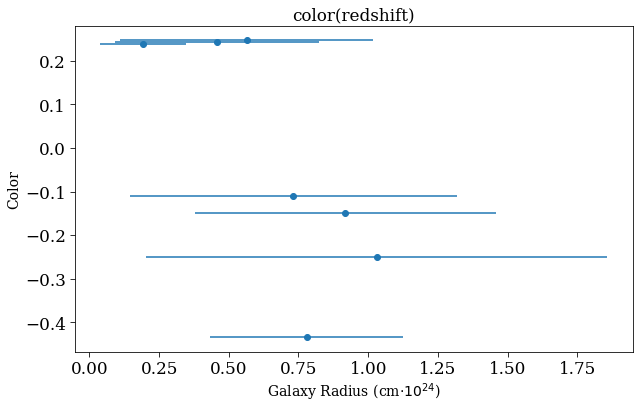

In [128]:
color_arr = [-0.149,-0.249,-0.433,0.238,0.247,0.243,-0.109]
galaxy_R = [i/(10**24) for i in [9.1808382724394E+23,1.0303641914187E+24,7.79040952527132E+23,1.92110173427306E+23,5.64254160877064E+23,4.56514844090146E+23,7.30864872041409E+23]]
galaxy_dR =[i/(10**24) for i in [5.3952815908911E+23,8.26644236162262E+23,3.47213392938058E+23,1.54127718461784E+23,4.52695112895377E+23,3.66263837674959E+23,5.86363234487284E+23]]
plt.errorbar(galaxy_R, color_arr, xerr=galaxy_dR, fmt="o", label="(Radious, color)")
plt.title("color(redshift)")
plt.xlabel("Galaxy Radius (cm$\cdot 10^{24}$)")
plt.ylabel("Color")
plt.plot